### Polycystic ovary syndrome

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as mplt
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

### Read dataset

In [4]:
dataset=pd.read_csv("/content/drive/MyDrive/dataset/data.csv")
dataset

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


### Data Analysis

In [5]:
dataset.shape

(541, 45)

In [6]:
dataset.isnull().values.any()

True

In [7]:
dataset.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

check the null value in dataset

In [8]:
dataset.corr() #Correlation

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.083578,0.001705,-0.044533,-0.015196,...,0.160834,0.154135,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
Patient File No.,1.000000,1.000000,0.060998,0.067133,-0.082823,-0.011700,-0.083578,0.001705,-0.044533,-0.015196,...,0.160834,0.154135,0.000110,0.013399,0.009798,0.049658,0.086969,0.289706,0.244608,0.027219
PCOS (Y/N),0.060998,0.060998,1.000000,-0.168513,0.211938,0.068254,0.199534,0.036433,0.091821,0.036928,...,0.286077,0.377933,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),0.067133,0.067133,-0.168513,1.000000,-0.029734,-0.119819,0.021261,-0.010954,0.045831,0.087382,...,-0.032921,-0.037694,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),-0.082823,-0.082823,0.211938,-0.029734,1.000000,0.420098,0.901675,0.072682,0.019983,0.043614,...,0.063983,0.162015,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),-0.011700,-0.011700,0.068254,-0.119819,0.420098,1.000000,-0.006878,0.040825,-0.074339,-0.029459,...,0.061129,0.032418,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,-0.083578,-0.083578,0.199534,0.021261,0.901675,-0.006878,1.000000,0.061939,0.050529,0.061905,...,0.045656,0.159279,-0.080192,0.069491,0.139975,0.142886,0.104204,-0.011610,-0.111522,0.009349
Blood Group,0.001705,0.001705,0.036433,-0.010954,0.072682,0.040825,0.061939,1.000000,0.047572,-0.023766,...,0.039029,-0.035090,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),-0.044533,-0.044533,0.091821,0.045831,0.019983,-0.074339,0.050529,0.047572,1.000000,0.303804,...,-0.003039,0.059804,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),-0.015196,-0.015196,0.036928,0.087382,0.043614,-0.029459,0.061905,-0.023766,0.303804,1.000000,...,0.029242,0.135479,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930


In [9]:
dataset.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [10]:
dataset.groupby('PCOS (Y/N)').size()

PCOS (Y/N)
0    364
1    177
dtype: int64

In [11]:
def handle_non_numerical_data(dataset):
    columns = dataset.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if dataset[column].dtype != np.int64 and dataset[column].dtype != np.float64:
            column_contents = dataset[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            dataset[column] = list(map(convert_to_int, dataset[column]))

    return dataset

In [12]:
dataset = handle_non_numerical_data(dataset)
print(dataset.head())

   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0            

# Data Visualization

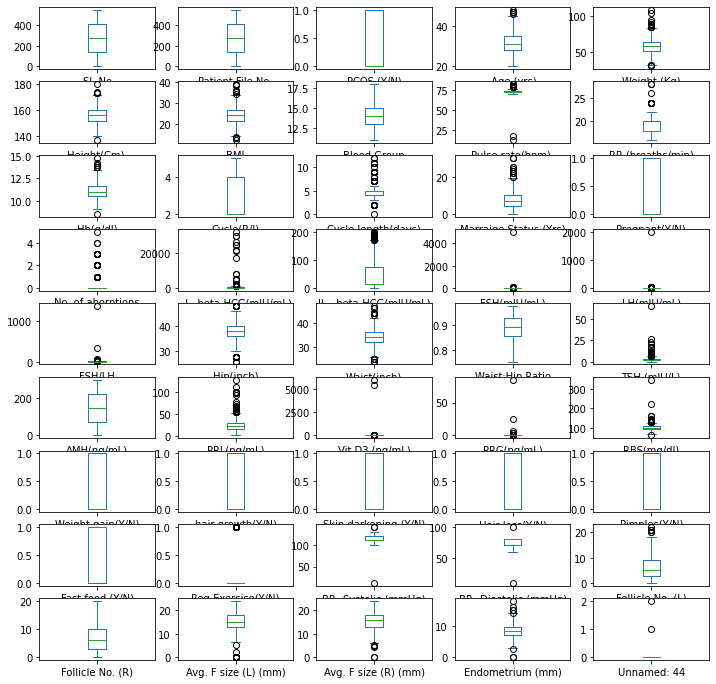

In [13]:
dataset.plot(kind='box', subplots=True, figsize=(12,12), layout=(9,5))
mplt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


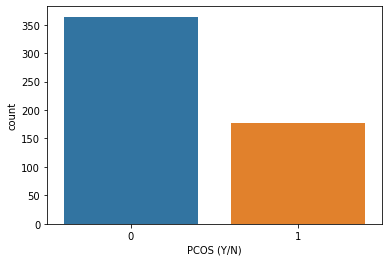

In [14]:
sns.countplot(dataset['PCOS (Y/N)'])

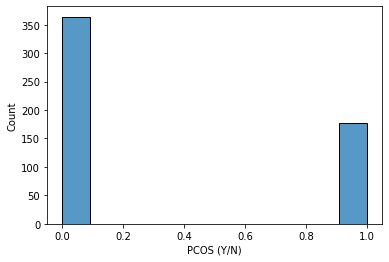

In [15]:
sns.histplot(data=dataset, x="PCOS (Y/N)")

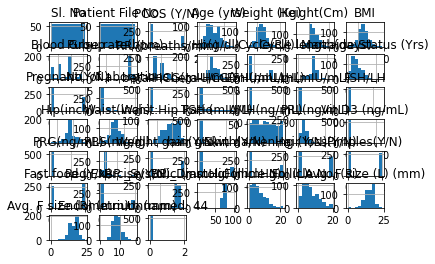

In [16]:
dataset.hist()
mplt.show()

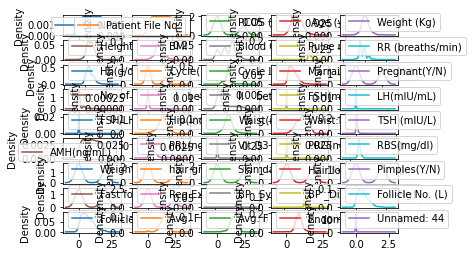

In [17]:
dataset.plot(kind='density', subplots=True, layout=(9,5), sharex=False) #Density Plots
mplt.show()

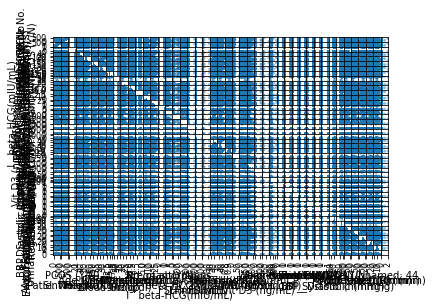

In [18]:
pd.plotting.scatter_matrix(dataset)
mplt.show()

# Train the model using dataset

In [19]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, 2]

In [20]:
X

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.000,19.300000,15,78,22,10.48,2,5,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.500,24.921163,15,74,20,11.70,2,5,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.000,25.270891,11,72,18,11.80,2,5,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.000,29.674945,13,72,20,12.00,2,5,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.000,20.060954,11,72,18,10.00,2,5,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,35,50.0,164.592,18.500000,17,72,16,11.00,2,5,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,30,63.2,158.000,25.300000,15,72,18,10.80,2,5,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,36,54.0,152.000,23.400000,13,74,20,10.80,2,6,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,27,50.0,150.000,22.200000,15,74,20,12.00,4,2,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [21]:
y

0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: PCOS (Y/N), Length: 541, dtype: int64

In [22]:
X.isnull().sum()

 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

imputer.fit(X)
X = pd.DataFrame(data=imputer.transform(X) , columns=X.columns)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

# KNeighborsClassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
k=int(input("Enter the value of K="))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train.ravel())
knnpredict=knn.predict(X_test)

Enter the value of K=3


In [26]:
knn.score(X_test,y_test)

0.6146788990825688

# GaussianProcessClassifier

In [27]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc=GaussianProcessClassifier()
gpc.fit(X_train,y_train.ravel())
gpcpredict=gpc.predict(X_test)

In [28]:
gpc.score(X_test,y_test)

0.6330275229357798

# Gaussian Naive bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train.ravel())
gnbpredict=gnb.predict(X_test)

In [30]:
gnb.score(X_test,y_test)

0.8623853211009175

# SVC (support-vector-machine-algorithm)

In [31]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train.ravel())
svcpredict=svc.predict(X_test)

In [32]:
svc.score(X_test,y_test)

0.6697247706422018

# RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train.ravel()) 
#used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array

RandomForestClassifier()

In [34]:
predict_train_data = random_forest_model.predict(X_test)

random_forest_model.score(X_test,y_test)

0.8165137614678899

# DecisionTreeClassifier

In [35]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
predictt = dtc.predict(X_test)

In [36]:
dtc.score(X_test,y_test)

0.7614678899082569

#Confusion Matrix

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,knnpredict))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        72
           1       0.41      0.30      0.34        37

    accuracy                           0.61       109
   macro avg       0.55      0.54      0.54       109
weighted avg       0.59      0.61      0.60       109



In [38]:
print(confusion_matrix(y_test,knnpredict))

[[56 16]
 [26 11]]


In [39]:
print(classification_report(y_test,gpcpredict))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76        72
           1       0.36      0.11      0.17        37

    accuracy                           0.63       109
   macro avg       0.51      0.51      0.47       109
weighted avg       0.56      0.63      0.56       109



In [40]:
print(confusion_matrix(y_test,gpcpredict))

[[65  7]
 [33  4]]


In [41]:
print(classification_report(y_test,gnbpredict))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        72
           1       0.78      0.84      0.81        37

    accuracy                           0.86       109
   macro avg       0.84      0.86      0.85       109
weighted avg       0.87      0.86      0.86       109



In [42]:
print(confusion_matrix(y_test,gnbpredict))

[[63  9]
 [ 6 31]]


In [43]:
print(classification_report(y_test,svcpredict))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        72
           1       1.00      0.03      0.05        37

    accuracy                           0.67       109
   macro avg       0.83      0.51      0.43       109
weighted avg       0.78      0.67      0.55       109



In [44]:
print(confusion_matrix(y_test,svcpredict))

[[72  0]
 [36  1]]


In [45]:
print(classification_report(y_test,predict_train_data))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        72
           1       0.84      0.57      0.68        37

    accuracy                           0.82       109
   macro avg       0.82      0.76      0.77       109
weighted avg       0.82      0.82      0.81       109



In [46]:
print(confusion_matrix(y_test,predict_train_data))

[[68  4]
 [16 21]]


In [47]:
print(classification_report(y_test,predictt))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        72
           1       0.69      0.54      0.61        37

    accuracy                           0.76       109
   macro avg       0.74      0.71      0.72       109
weighted avg       0.75      0.76      0.75       109



In [48]:
print(confusion_matrix(y_test,predictt))

[[63  9]
 [17 20]]


# Tree Visualization

In [49]:
import six #!pip install --upgrade scikit-learn==0.20.3
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image   
from sklearn.tree import export_graphviz
import pydot 

features = list(dataset.columns[3:44])
features

[' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 '  I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

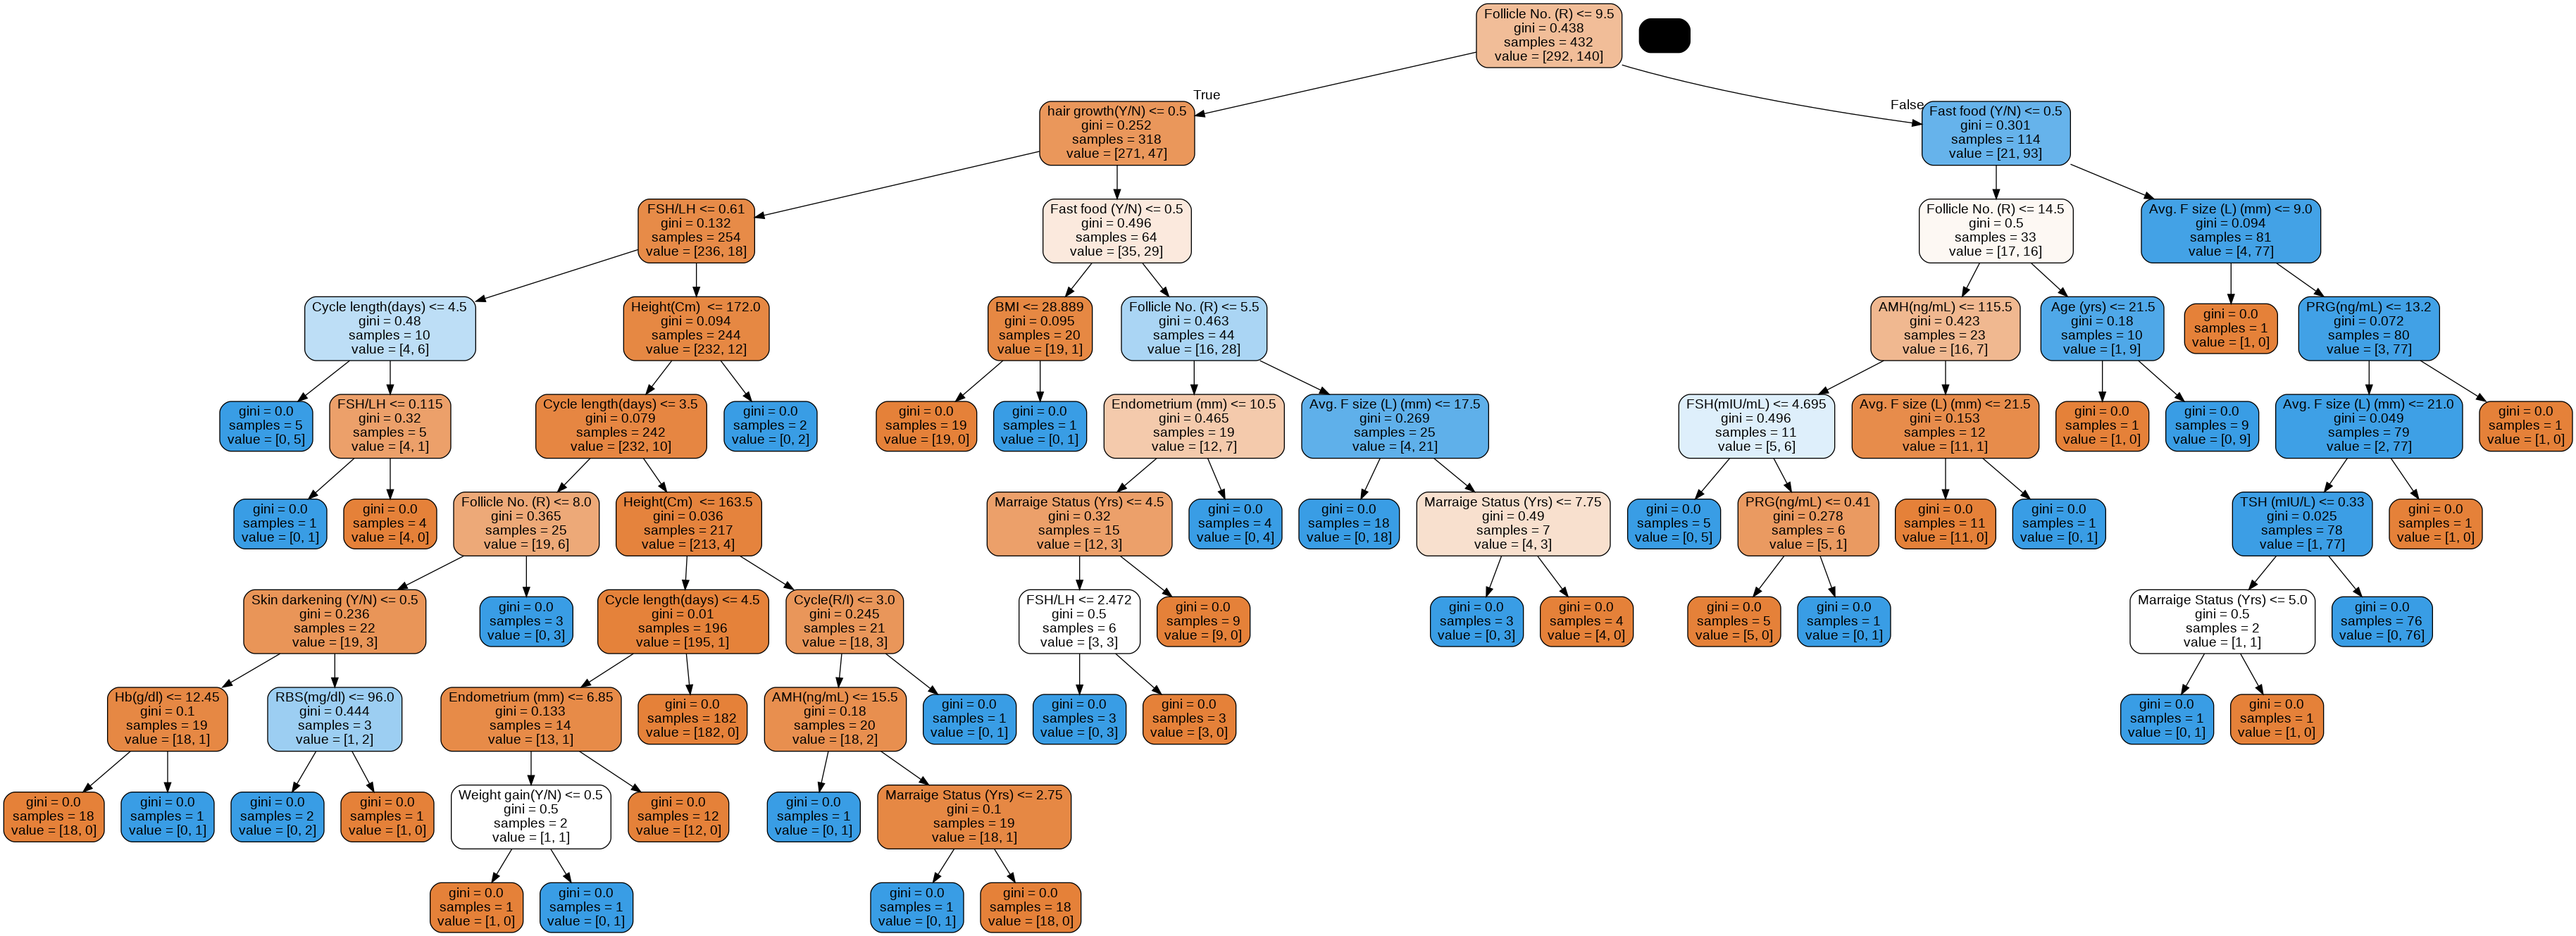

In [50]:
from io import StringIO
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  